# Predict the Introverts from the Extroverts


## Imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

2025-07-25 11:43:28.137711: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753443808.380932      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753443808.448983      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Get the Data

In [2]:
train_df = pd.read_csv('/kaggle/input/playground-series-s5e7/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s5e7/test.csv')

In [3]:
ids = test_df['id']

In [4]:
train_df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [6]:
train_df.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


In [7]:
train_df.isnull().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [8]:
train_df.isnull().sum()/len(train_df)

id                           0.000000
Time_spent_Alone             0.064241
Stage_fear                   0.102192
Social_event_attendance      0.063701
Going_outside                0.079141
Drained_after_socializing    0.062028
Friends_circle_size          0.056899
Post_frequency               0.068236
Personality                  0.000000
dtype: float64

In [9]:
train_df.duplicated().sum()

0

## EDA

<Figure size 1200x500 with 0 Axes>

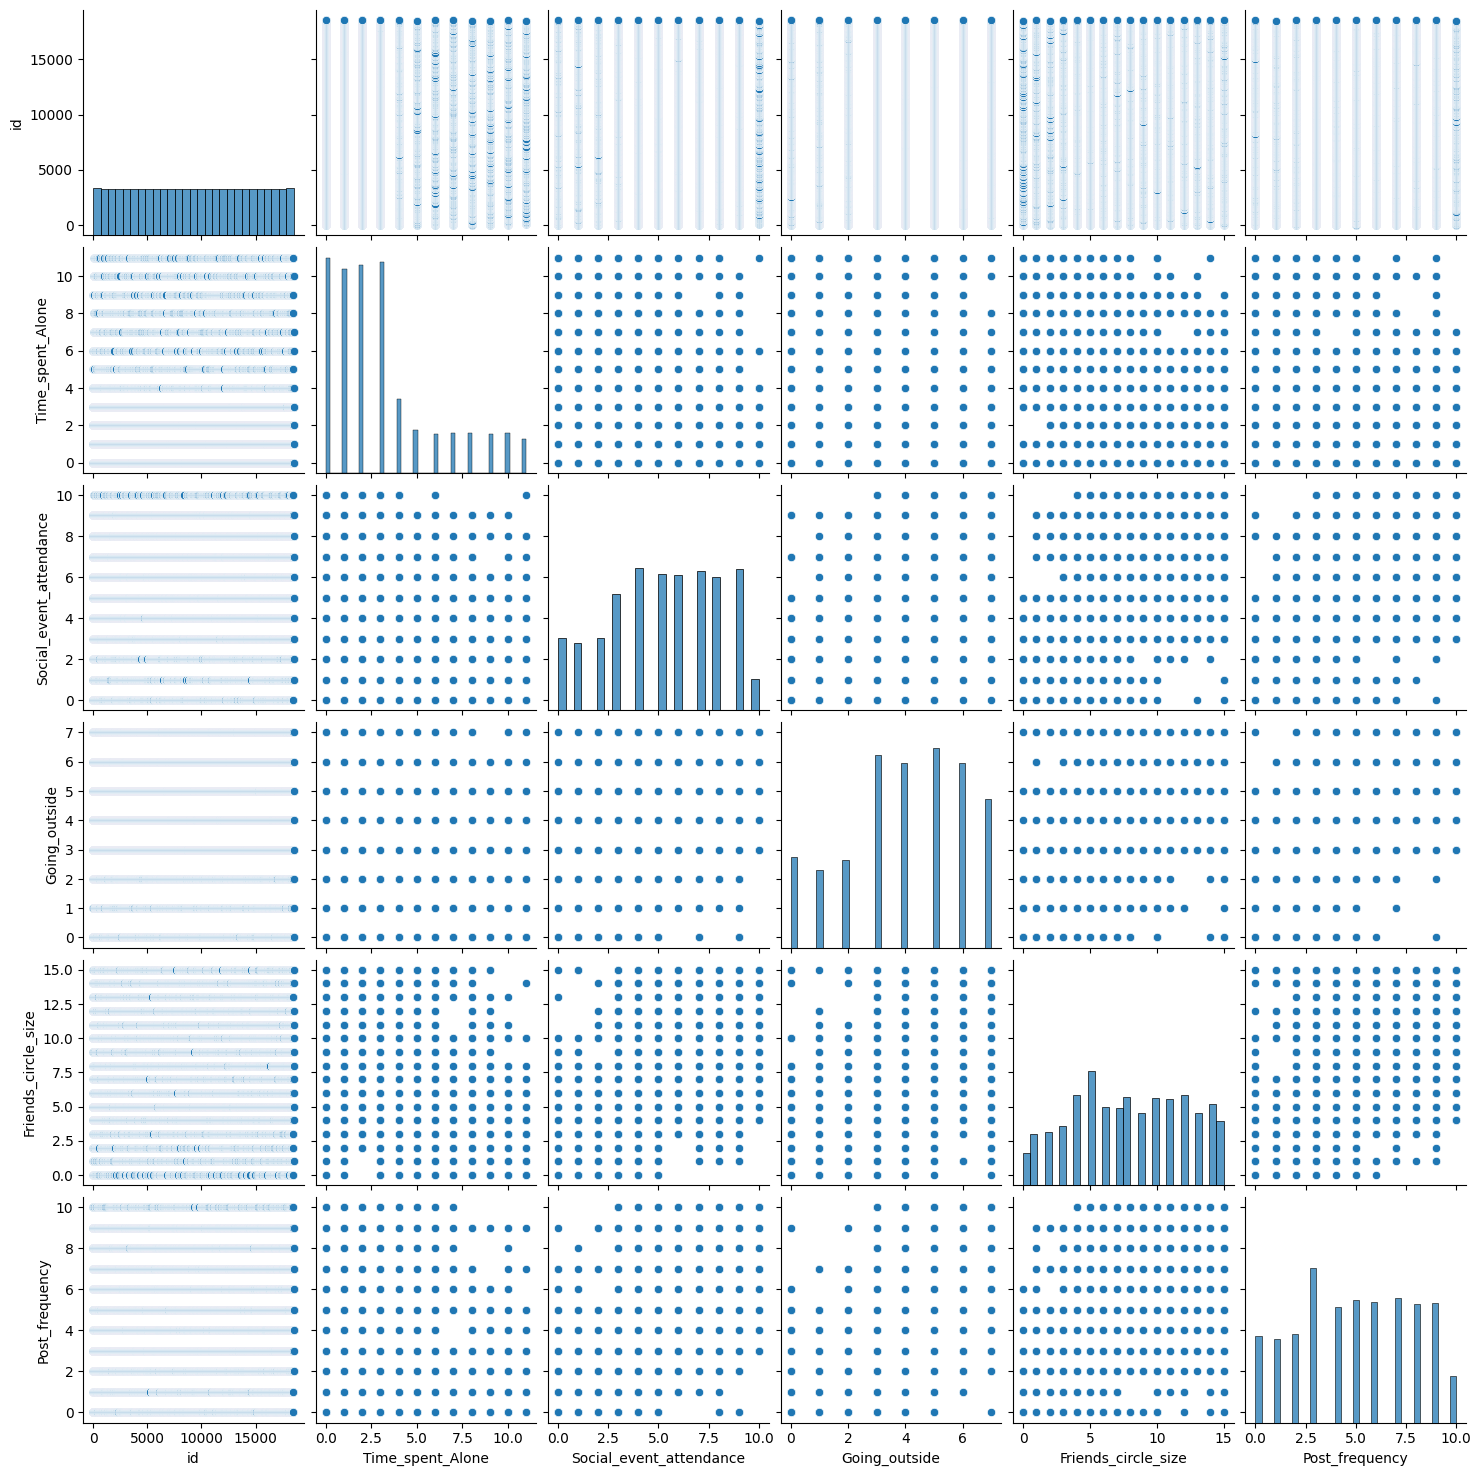

In [10]:
plt.figure(figsize=(12,5))
sns.pairplot(train_df)

<Axes: >

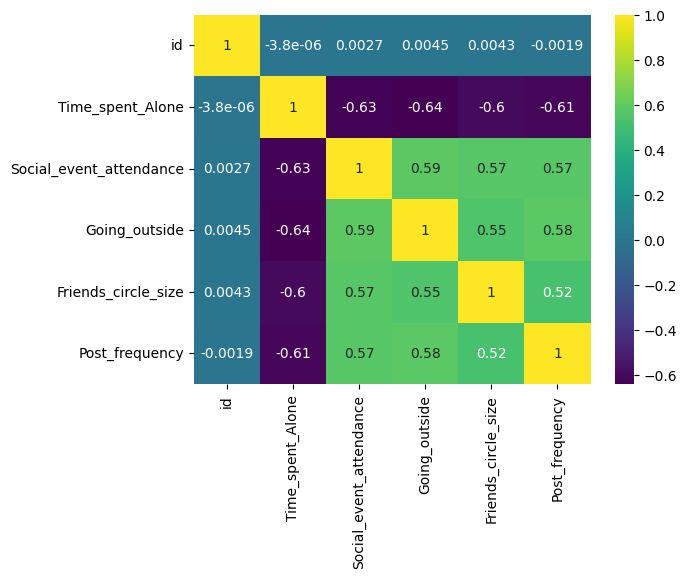

In [11]:
sns.heatmap(train_df.corr(numeric_only=True),cmap='viridis',annot=True)

It can be understood that `Time_spent_Alone` has the highst correlation, whereas other columns have almost the same correlation

<Axes: >

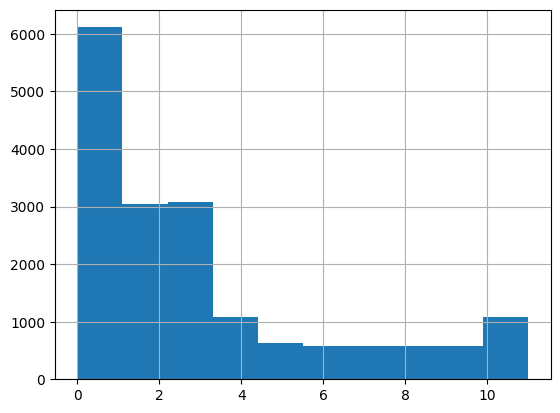

In [12]:
train_df['Time_spent_Alone'].hist(bins=10)

<Axes: xlabel='Time_spent_Alone', ylabel='count'>

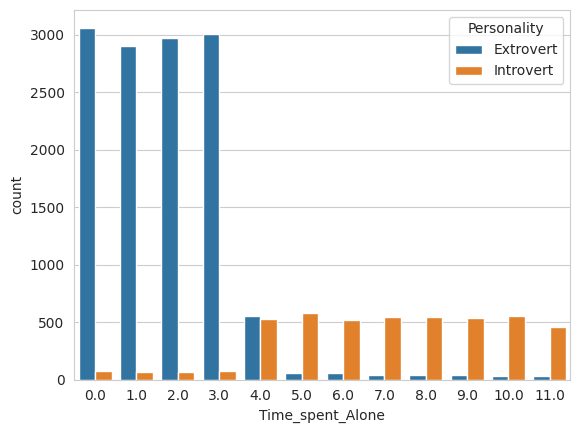

In [13]:
sns.set_style('whitegrid')
sns.countplot(train_df,x='Time_spent_Alone',hue='Personality')

<Axes: xlabel='Social_event_attendance', ylabel='count'>

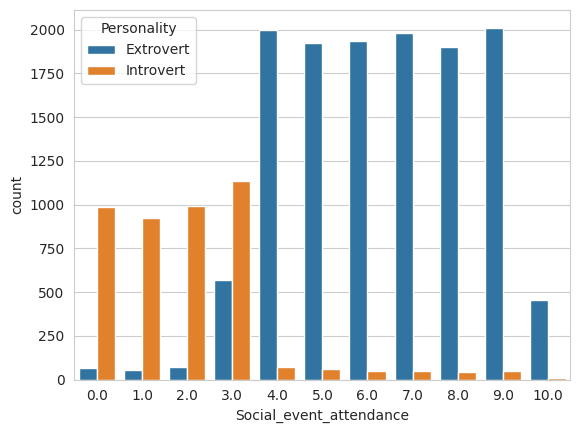

In [14]:
sns.countplot(train_df,x='Social_event_attendance',hue='Personality')

<Axes: xlabel='Stage_fear', ylabel='count'>

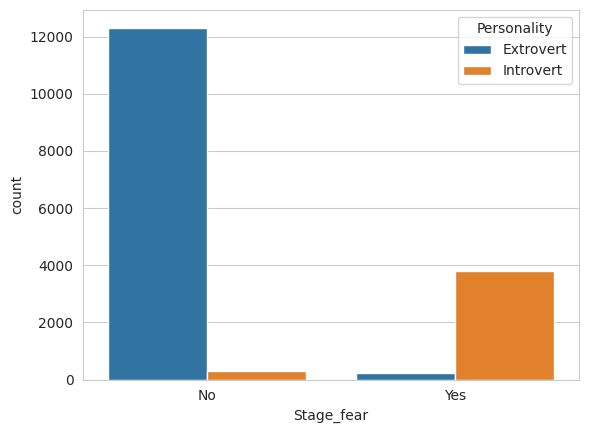

In [15]:
sns.countplot(train_df,x='Stage_fear',hue='Personality')

<Axes: xlabel='Going_outside', ylabel='count'>

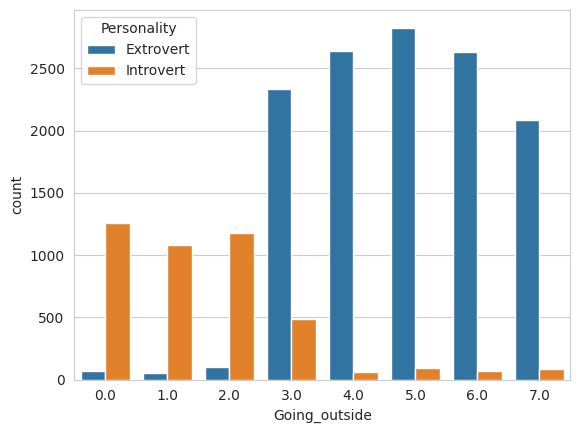

In [16]:
sns.countplot(train_df,x='Going_outside',hue='Personality')

<Axes: xlabel='Drained_after_socializing', ylabel='count'>

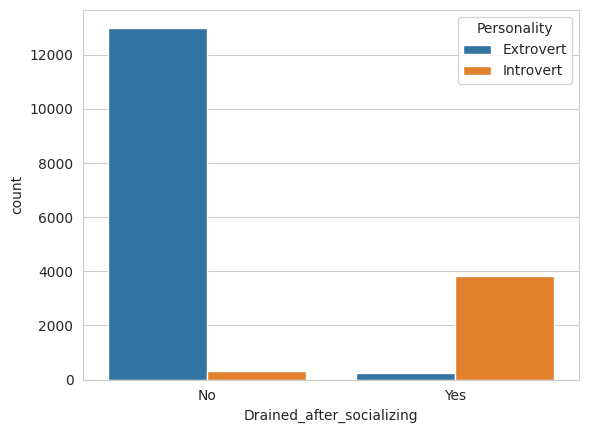

In [17]:
sns.countplot(train_df,x='Drained_after_socializing',hue='Personality')

<Axes: xlabel='Friends_circle_size', ylabel='count'>

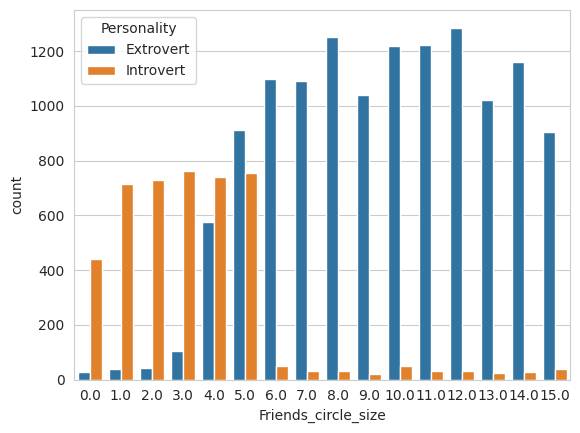

In [18]:
sns.countplot(train_df,x='Friends_circle_size',hue='Personality')

<Axes: xlabel='Post_frequency', ylabel='count'>

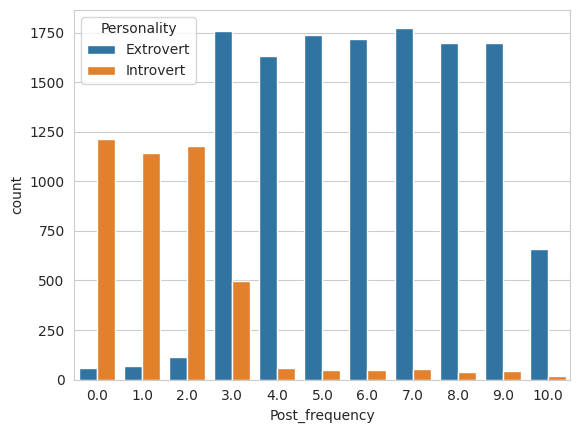

In [19]:
sns.countplot(train_df,x='Post_frequency',hue='Personality')

The dataset is clear to understand, not complicated and straight-forward.

## Handling Missing Values and Feature Engineering

<Axes: >

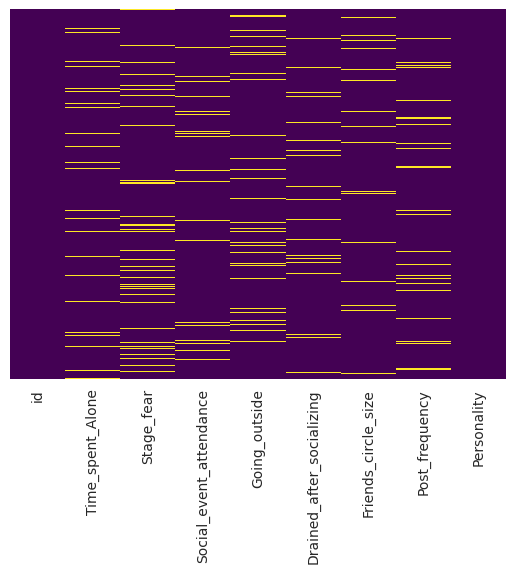

In [20]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,annot=False,cmap='viridis')

In [21]:
train_df['Personality'] = train_df['Personality'].map({'Introvert':0, 'Extrovert':1})

In [22]:
introvert_thresh = {
    'Time_spent_Alone': 4.0,
    'Social_event_attendance': 3.0,
    'Going_outside': 2.0,
    'Friends_circle_size': 4.0,
    'Post_frequency': 2.0
}

threshold_cols = list(introvert_thresh.keys())

def should_impute_lower(row, current_col):
    other_cols = [col for col in threshold_cols if col != current_col]
    for col in other_cols:
        if pd.notna(row[col]) and row[col] > introvert_thresh[col]:
            return False  
    return True 

for col in threshold_cols:
    threshold = introvert_thresh[col]
    for idx in train_df[train_df[col].isna()].index: 
        row = train_df.loc[idx]
        if should_impute_lower(row, col):
            train_df.at[idx, col] = threshold - 1 
        else:
            train_df.at[idx, col] = threshold  

for col in threshold_cols:
    threshold = introvert_thresh[col]
    for idx in test_df[test_df[col].isna()].index: 
        row = test_df.loc[idx]
        if should_impute_lower(row, col):
            test_df.at[idx, col] = threshold - 1 
        else:
            test_df.at[idx, col] = threshold 

categorical_cols = ['Stage_fear', 'Drained_after_socializing']
for col in categorical_cols:
    mode_val = train_df[col].mode()[0]  
    train_df[col].fillna(mode_val, inplace=True)
    test_df[col].fillna(mode_val, inplace=True)  

<Axes: >

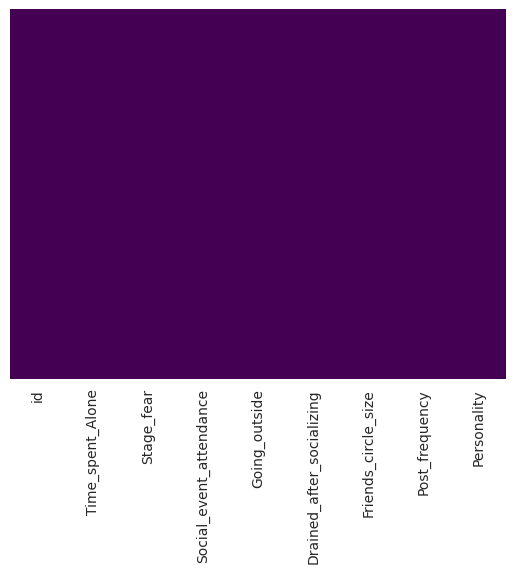

In [23]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,annot=False,cmap='viridis')

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           18524 non-null  float64
 2   Stage_fear                 18524 non-null  object 
 3   Social_event_attendance    18524 non-null  float64
 4   Going_outside              18524 non-null  float64
 5   Drained_after_socializing  18524 non-null  object 
 6   Friends_circle_size        18524 non-null  float64
 7   Post_frequency             18524 non-null  float64
 8   Personality                18524 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 1.3+ MB


In [25]:
train_df['Drained_after_socializing'].value_counts()

Drained_after_socializing
No     14462
Yes     4062
Name: count, dtype: int64

In [26]:
train_df['Drained_after_socializing'] = train_df['Drained_after_socializing'].map({'No':0, 'Yes':1})
test_df['Drained_after_socializing'] = test_df['Drained_after_socializing'].map({'No':0, 'Yes':1})

In [27]:
train_df['Stage_fear'].value_counts()

Stage_fear
No     14502
Yes     4022
Name: count, dtype: int64

In [28]:
train_df['Stage_fear'] = train_df['Stage_fear'].map({'No':0, 'Yes':1})
test_df['Stage_fear'] = test_df['Stage_fear'].map({'No':0, 'Yes':1})

In [29]:
train_df.drop('id',axis=1,inplace=True)
test_df.drop('id',axis=1,inplace=True)

## Train Test Split

In [30]:
X = train_df.drop('Personality',axis=1)
y = train_df['Personality']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Logistic Regression Model

In [32]:
lr_model = LogisticRegression()

lr_model.fit(X_train,y_train)

lr_predictions = lr_model.predict(X_test)

print(confusion_matrix(y_test,lr_predictions))
print('\n')
print(classification_report(y_test,lr_predictions))

[[1356   93]
 [  86 4023]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1449
           1       0.98      0.98      0.98      4109

    accuracy                           0.97      5558
   macro avg       0.96      0.96      0.96      5558
weighted avg       0.97      0.97      0.97      5558



## Training a SVM Model

In [33]:
param_grid_svm = {'C' : [0.1, 1, 10, 100, 1000], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001], 'kernel' : ['rbf']}

grid_svm = GridSearchCV(SVC(),param_grid_svm,verbose=1)

grid_svm.fit(X_train,y_train)

svm_predictions = grid_svm.predict(X_test)

print(confusion_matrix(y_test,svm_predictions))
print('\n')
print(classification_report(y_test,svm_predictions))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[[1360   89]
 [  87 4022]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1449
           1       0.98      0.98      0.98      4109

    accuracy                           0.97      5558
   macro avg       0.96      0.96      0.96      5558
weighted avg       0.97      0.97      0.97      5558



## Training a Decision Tree Model

In [34]:
dt_model = DecisionTreeClassifier()

dt_model.fit(X_train,y_train)

dt_predictions = dt_model.predict(X_test)

print(confusion_matrix(y_test,dt_predictions))
print('\n')
print(classification_report(y_test,dt_predictions))

[[1293  156]
 [ 237 3872]]


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1449
           1       0.96      0.94      0.95      4109

    accuracy                           0.93      5558
   macro avg       0.90      0.92      0.91      5558
weighted avg       0.93      0.93      0.93      5558



## Training a Random Forest Model

In [35]:
rf_model = RandomForestClassifier(n_estimators=100)

rf_model.fit(X_train,y_train)

rf_predictions = rf_model.predict(X_test)

print(confusion_matrix(y_test,rf_predictions))
print('\n')
print(classification_report(y_test,rf_predictions))

[[1337  112]
 [ 105 4004]]


              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1449
           1       0.97      0.97      0.97      4109

    accuracy                           0.96      5558
   macro avg       0.95      0.95      0.95      5558
weighted avg       0.96      0.96      0.96      5558



## Training a NN Model

In [36]:
X_train.shape

(12966, 7)

In [37]:
model = Sequential()

# input layer of nn
model.add(Dense(64,activation='relu',input_shape=(7,)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

# first hidden layer
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

optimizer = Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

2025-07-25 11:56:06.467179: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [38]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=25,verbose=1,restore_best_weights=True)
model.fit(x=X_train, y=y_train, batch_size=128, epochs=600, validation_data=[X_test,y_test], callbacks=[early_stop])

Epoch 1/600
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6940 - loss: 0.6582 - val_accuracy: 0.9545 - val_loss: 0.2592
Epoch 2/600
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8630 - loss: 0.3821 - val_accuracy: 0.9624 - val_loss: 0.2560
Epoch 3/600
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9433 - loss: 0.2745 - val_accuracy: 0.9655 - val_loss: 0.2367
Epoch 4/600
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9573 - loss: 0.2369 - val_accuracy: 0.9669 - val_loss: 0.2177
Epoch 5/600
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9598 - loss: 0.2224 - val_accuracy: 0.9676 - val_loss: 0.2085
Epoch 6/600
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9653 - loss: 0.2117 - val_accuracy: 0.9674 - val_loss: 0.2003
Epoch 7/600
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9701 - loss: 0.1855 - val_accuracy: 0.9674 - val_loss: 0.1961
Epoch 8/600
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9702 - loss: 0.1941 - val_accu

<Axes: >

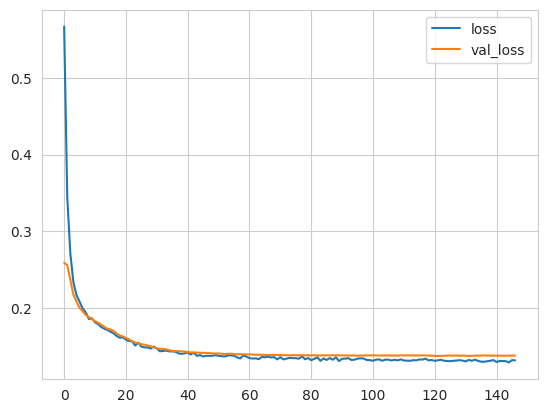

In [39]:
loss = pd.DataFrame(model.history.history)
loss[['loss','val_loss']].plot()

## Submission

In [40]:
X_test_kaggle = test_df.copy()

In [41]:
classes = {0:'Introvert',1:'Extrovert'}
label_mapping = np.vectorize(classes.get)

# logistic regression 
lr_predictions_kaggle = lr_model.predict(X_test_kaggle)
lr_predicted_labels = label_mapping(lr_predictions_kaggle)
submission_lr = pd.DataFrame({'id': ids,'Personality': lr_predicted_labels.reshape(-1)})
submission_lr.to_csv('submission_lr.csv', index=False)


# SVM 
svm_predictions_kaggle = grid_svm.predict(X_test_kaggle)
svm_predicted_labels = label_mapping(svm_predictions_kaggle)
submission_svm = pd.DataFrame({'id': ids,'Personality': svm_predicted_labels.reshape(-1)})
submission_svm.to_csv('submission_svm.csv', index=False)

# decision tree
dt_predictions_kaggle = dt_model.predict(X_test_kaggle)
dt_predicted_labels = label_mapping(dt_predictions_kaggle)
submission_dt = pd.DataFrame({'id': ids,'Personality' : dt_predicted_labels.reshape(-1)})
submission_dt.to_csv('submission_dt.csv', index=False)

# random forest
rf_predictions_kaggle = rf_model.predict(X_test_kaggle)
rf_predicted_labels = label_mapping(rf_predictions_kaggle)
submission_rf = pd.DataFrame({'id': ids,'Personality' : rf_predicted_labels.reshape(-1)})
submission_rf.to_csv('submission_rf.csv', index=False)

# nn 
nn_predictions_kaggle = model.predict(X_test_kaggle)
nn_predictions_kaggle = (nn_predictions_kaggle > 0.5).astype(int)
nn_predicted_labels = label_mapping(nn_predictions_kaggle)
submission_nn = pd.DataFrame({'id': ids,'Personality' : nn_predicted_labels.reshape(-1)})
submission_nn.to_csv('submission_nn.csv', index=False)

193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
